In [133]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.schema import Document

import os
from PIL import Image

from dotenv import load_dotenv
load_dotenv()

True

# 디비 내용 보기

In [37]:
vectorstore = Chroma(embedding_function=OpenAIEmbeddings(), persist_directory='./testDB')
retriever = vectorstore.as_retriever(search_kwargs={"k":3})

In [38]:
vectorstore

In [39]:
vectorstore.get()

{'ids': ['ac1f3ffa-8cae-4654-8bdb-2ea8f09333c0',
  '487c707f-2d08-487e-94df-56662983962a',
  'dc8683f0-34c2-418d-a966-a64692b8c086',
  'a21b45c0-bc04-4696-bfbb-c976a83a8a47',
  '22715ced-04ed-43cb-9451-6adc15867521',
  '026ead3c-ec5f-4a95-9b80-73725898f95d',
  'dfa22809-19d8-4107-b41e-0fee08ec78ea',
  'd14a241b-b512-426a-a3c2-4c6e7875be38',
  'b9648575-d7db-4c85-a163-2c545366dc61',
  'a118172a-b54e-4d78-9054-222f4b1a719d',
  '96206a6a-e0ef-4b6f-a754-2741928b96f4',
  '2aafa23b-063c-4c6f-bb86-0f85afd4cfd7',
  '66baad7e-1ed1-4755-aa21-299dd8861172',
  '99f9a25f-a3e2-4ba7-998b-ec604c6ae86f',
  '76c35427-a7e7-4049-b6fe-58022b77a9f3',
  '87358446-8b24-4c44-8415-af6c335e9df4',
  '575a79bc-0c40-4a16-994e-9d24dc286004'],
 'embeddings': None,
 'documents': ['[해양쓰레기  소개] \n해양쓰레기란 ? \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n종류 \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  

In [22]:
vectorstore.get().keys()

dict_keys(['ids', 'embeddings', 'documents', 'uris', 'data', 'metadatas', 'included'])

In [23]:
vectorstore.get()['ids']

['ac1f3ffa-8cae-4654-8bdb-2ea8f09333c0',
 '487c707f-2d08-487e-94df-56662983962a',
 'dc8683f0-34c2-418d-a966-a64692b8c086',
 'a21b45c0-bc04-4696-bfbb-c976a83a8a47',
 '22715ced-04ed-43cb-9451-6adc15867521',
 '026ead3c-ec5f-4a95-9b80-73725898f95d',
 'dfa22809-19d8-4107-b41e-0fee08ec78ea',
 'd14a241b-b512-426a-a3c2-4c6e7875be38',
 'b9648575-d7db-4c85-a163-2c545366dc61',
 'a118172a-b54e-4d78-9054-222f4b1a719d',
 '96206a6a-e0ef-4b6f-a754-2741928b96f4',
 '2aafa23b-063c-4c6f-bb86-0f85afd4cfd7',
 '66baad7e-1ed1-4755-aa21-299dd8861172']

In [24]:
vectorstore.get()['documents']

['[해양쓰레기  소개] \n해양쓰레기란 ? \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n종류 \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .',
 '물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 .',
 '해변에  놀러 온 피서객 , 행락객들이  바닷가에  쓰레기를  함부로  버리고  방치하면  파도나  강풍에  \n휩쓸려  바다로  들어옵니다 . 배에서  바다로  버리는  경우도  많습니다 . 어업용 , 낚시용 , 레저용  선박, \n상선이나  군함 등 모든 선박에서  무의식적으로  버리는  것들이  곧 해양쓰레기가  됩니다 . 양식 시\n설이나  어구, 어망 등의 경우, 시설이나  어구를  교체할  때 태풍과  강풍으로  인해 떨어져  나가면서  \n쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황]',
 '쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황] \n국내 해양쓰레기  현황은  매년 바다로  들어오는  해양쓰레기의  총량은  약 12만톤~14만톤으로  추정\n됩니다 . 육지에서

In [25]:
vectorstore.get()['metadatas']

[{'page': 0, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 0, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 0, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 0, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 0, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 1, 'source': 'C:/project4/해양쓰레기.pdf'},
 {'page': 2, 'source': 'C:/project4/해양쓰레기.pdf'}]

In [26]:
vectorstore.get()['uris']

In [27]:
em = vectorstore.get()['embeddings']
em

In [28]:
vectorstore.get()['data']

In [29]:
vectorstore.get()['included']

[<IncludeEnum.documents: 'documents'>, <IncludeEnum.metadatas: 'metadatas'>]

In [33]:
vectorstore.add_texts(["Ocean conservation is crucial.", "Coral reefs are endangered."])

# 다시 데이터 점검
print(vectorstore.get()["embeddings"])  # 새로 추가된 임베딩 확인

None


In [40]:
vectorstore.get()['documents']

['[해양쓰레기  소개] \n해양쓰레기란 ? \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n종류 \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .',
 '물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 .',
 '해변에  놀러 온 피서객 , 행락객들이  바닷가에  쓰레기를  함부로  버리고  방치하면  파도나  강풍에  \n휩쓸려  바다로  들어옵니다 . 배에서  바다로  버리는  경우도  많습니다 . 어업용 , 낚시용 , 레저용  선박, \n상선이나  군함 등 모든 선박에서  무의식적으로  버리는  것들이  곧 해양쓰레기가  됩니다 . 양식 시\n설이나  어구, 어망 등의 경우, 시설이나  어구를  교체할  때 태풍과  강풍으로  인해 떨어져  나가면서  \n쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황]',
 '쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황] \n국내 해양쓰레기  현황은  매년 바다로  들어오는  해양쓰레기의  총량은  약 12만톤~14만톤으로  추정\n됩니다 . 육지에서

In [34]:
embedding_model = OpenAIEmbeddings()
sample_text = "Test if embeddings are working correctly."
embedding = embedding_model.embed_query(sample_text)
print("Generated Embedding:", embedding)  # 정상적으로 벡터가 출력되어야 함

Generated Embedding: [-0.01669396460056305, 0.0036094151437282562, 0.010254096239805222, -0.012866306118667126, 0.016317913308739662, -0.0008939597755670547, -0.01323564164340496, -0.022052686661481857, -0.009837755002081394, -0.020212724804878235, -0.0037672221660614014, 0.014316787011921406, -0.010771166533231735, -0.013242356479167938, 0.0038478043861687183, 0.0020330240949988365, 0.010267526842653751, 0.015149470418691635, 0.02687419392168522, -0.03583225980401039, -0.014921153895556927, 0.004620051477104425, -0.016197040677070618, -0.021904952824115753, -0.019715800881385803, -0.01719088852405548, 0.01520319189876318, -0.031051043421030045, -0.00576163362711668, -0.016317913308739662, 0.01513604074716568, -0.014142191968858242, -0.023986661806702614, -0.018184736371040344, -0.015861280262470245, -0.00032652614754624665, 0.006607747636735439, -0.02365090325474739, 0.027800889685750008, 0.0070106592029333115, 0.008723032660782337, 0.00797764677554369, 0.008528292179107666, -0.037497

In [ ]:
# 메타데이터
# docs[0].metadata['content'] = 'dafdaga' # 추가
# del docs[0].metadata['content'] # 삭제

# docs[0]


Document(metadata={'source': 'C:/project4/chat/RAG데이터.pdf', 'page': 0, 'content': 'dafdaga'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .')

# 데이터 자르기

In [42]:
loader = PyPDFLoader('C:/project4/chat/RAG데이터2.pdf')
docs = loader.load()

print(type(docs))

<class 'list'>


In [43]:
docs[:5]

[Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 . \n해변에  놀러 온 피서객 , 행락객들이  바닷가에  쓰레기를  함부로  버리고  방치하면  파도나  강풍에  \n휩쓸려  바다로  들어옵니다 . 배에서  바다로  버리는  경우도  많습니다 . 어업용 , 낚시용 , 레저용  선박, \n상선이나  군함 등 모든 선박에서  무의식적으로  버리는  것들이  곧 해양쓰레기 가 됩니다 . 양식 시\n설이나  어구, 어망 등의 경우, 시설이나  어구를  교체할  때 태풍과  강풍으로  인해 떨어져  나가면서  \n쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황] \n국내 해양쓰레기  현황은  매년 바다로  들어오는  해양쓰레기의  총량은  약 12만톤~14만톤으로  추정

In [44]:
len(docs)

11

# docs 저장

In [45]:
import pickle

with open('docs_rag2.pkl', 'wb') as f:
    pickle.dump(docs, f)

In [46]:
with open('docs_rag2.pkl', 'rb') as f:
    docs = pickle.load(f)

In [47]:
docs

[Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 . \n해변에  놀러 온 피서객 , 행락객들이  바닷가에  쓰레기를  함부로  버리고  방치하면  파도나  강풍에  \n휩쓸려  바다로  들어옵니다 . 배에서  바다로  버리는  경우도  많습니다 . 어업용 , 낚시용 , 레저용  선박, \n상선이나  군함 등 모든 선박에서  무의식적으로  버리는  것들이  곧 해양쓰레기 가 됩니다 . 양식 시\n설이나  어구, 어망 등의 경우, 시설이나  어구를  교체할  때 태풍과  강풍으로  인해 떨어져  나가면서  \n쓰레기가  되기도  합니다 . \n \n[해양쓰레기  현황] \n국내 해양쓰레기  현황은  매년 바다로  들어오는  해양쓰레기의  총량은  약 12만톤~14만톤으로  추정

# 페이지마다 기본 이미지, 뉴스 링크 저장

(1110, 879)


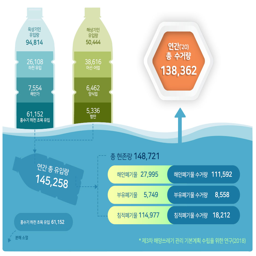

(640, 357)


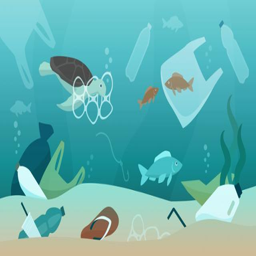

(590, 360)


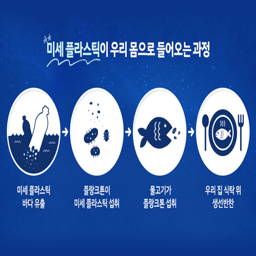

(747, 421)


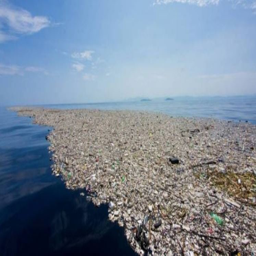

(680, 361)


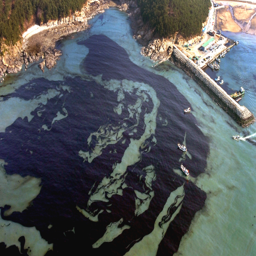

(700, 525)


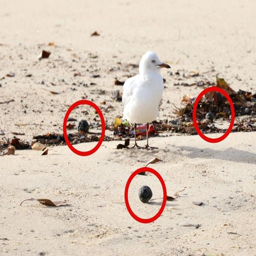

(800, 533)


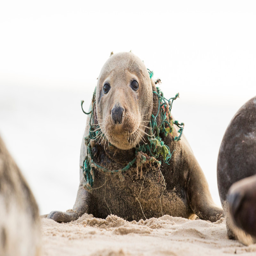

(1755, 696)


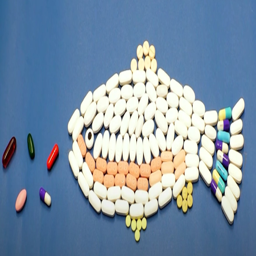

(640, 353)


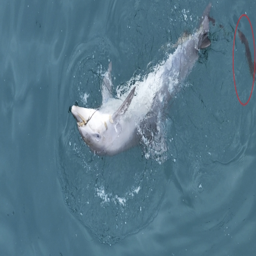

(1080, 607)


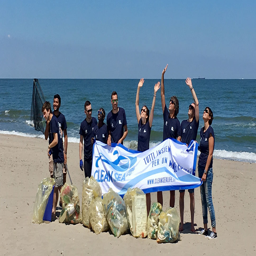

(600, 409)


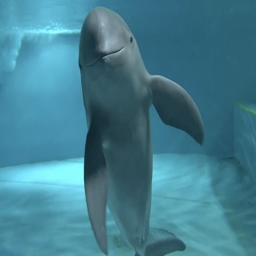

In [127]:
path = 'C:/project4/chat/images/'
for i in range(11):
    try:
        imgname = f'{i}.jpg'
        img = Image.open(path + imgname)
        print(img.size)
        resize_img = img.resize((256,256))
        resize_img.save(path + 'resize_' +imgname)

        display(resize_img)
    except: # 없으면
        pass

In [49]:
video_link = [
    'https://www.youtube.com/watch?v=qqDpDzl3RlU',
    'https://www.youtube.com/watch?v=vwz2wX0DnQI',
    'https://www.youtube.com/watch?v=NVjs3-ft4KU',
    'https://www.youtube.com/watch?v=yrdMIXrxx4E',
    'https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z',
    'https://www.youtube.com/watch?v=4P3H2I9pJZs',
    'https://www.youtube.com/watch?v=8En5Q6_LtyM',
    'https://www.youtube.com/watch?v=M9ITliT-2UE',
    'https://www.youtube.com/watch?v=MkGmC_fM3E8',
    'https://www.youtube.com/watch?v=a6zcxb3fTDk',
    'https://www.youtube.com/watch?v=7h1oDT30FSY'
    ]

In [58]:
# 기사, 이미지
for i in range(len(docs)):
    img_path = f'C:/project4/chat/images/resize_{i}.jpg'
    for doc in docs:
        if i == doc.metadata['page']:
            doc.metadata['news'] = video_link[i]
            if os.path.isfile(img_path):
                doc.metadata['image'] = img_path
            else:
                doc.metadata['image'] = ''
            print(doc.metadata)
            continue

{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 1, 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'image': ''}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 2, 'news': 'https://www.youtube.com/watch?v=NVjs3-ft4KU', 'image': 'C:/project4/chat/images/resize_2.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 3, 'news': 'https://www.youtube.com/watch?v=yrdMIXrxx4E', 'image': 'C:/project4/chat/images/resize_3.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 4, 'news': 'https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z', 'image': 'C:/project4/chat/images/resize_4.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 5, 'news': 'https://www.youtube.com/watch?v=4P3H2I9pJZs', 'image': 'C:/project4/chat/images/resize_5.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 6, 'news': 'https://www.youtube.

## check

In [51]:
docs[2]

Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 2, 'news': 'https://www.youtube.com/watch?v=NVjs3-ft4KU', 'image': 'C:/project4/chat/images/resize_2.jpg'}, page_content='[해양쓰레기  피해 사례 – 고통받는  바다] \n1. 미세 플라스틱  \n전세계  플라스틱  생산량은  지난 수십년간  급증했습니다 . 2022 년 OECD 에 따르면  매년 약 9%의 \n플라스틱만  재활용되고  남은 플라스틱  쓰레기의  대부분이  바다로  흘러들어  간다는  통계가  나왔습\n니다. 바닷속  플라스틱은  시간이  지나면서  지름이  5mm 이하인  더 작은 조각으로  분해가  되는데 , \n이것을  미세 플라스틱이라고  합니다 . 수많은  미세 플라스틱  조각이  해수면을  떠다니고  있습니다 . \n미세 플라스틱은  해수면뿐  아니라  해수층 , 해저 퇴적물 , 심지어는  북극의  해빙에서도  발견될  정도\n로 해양 생태계에  만연해  있습니다 . 전세계  바다에  떠다니는  미세플라스틱  입자가  171조개에  달\n하고 총 무게만  230만톤으로  추정된다는  연구 결과가  나왔습니 다. 연구진은  2005년 이후 해양 플\n라스틱  오염이  전례없이  증가하고  있어 현재의  상태가  지속된다면  2040년에는  바다로  유입되는  \n미세플라스틱의  양이 거의 3배에 달할 수 있다고  경고했습니다 .  \n문제는  바다 생물들이  이를 먹이로  오인한다는  데 있습니다 . 해양 생태학자들의  연구에  따르면  \n플랑크톤에서부터  어류, 해양 포유류에  이르기까지 , 먹이사슬의  모든 단계에  있는 생물이  미세 플\n라스틱을  먹을 수 있습니다 . 식탁에  흔히 오르는  해산물 , 그리고  생태계  유지에  필수적인  종도 여\n기에 포함됩니다 . \n이렇게  미세 플라스틱을  삼킨 해양 

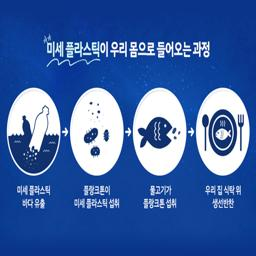

In [52]:
img = Image.open(docs[2].metadata['image'])
display(img)

In [53]:
docs

[Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 . \n해변에  놀러 온 피서객 , 행락객들이  바닷가에  쓰레기를  함부로  버리고  방치하면  파도나  강풍에  \n휩쓸려  바다로  들어옵니다 . 배에서  바다로  버리는  경우도  많습니다 . 어업용 , 낚시용 , 레저용  선박, \n상선이나  군함 등 모든 선박에서  무의식적으로  버리는  것들이  곧 해양쓰레기 가 됩니다 . 양식 시\n설이나  어구, 어망 등의 경우, 시설이나  어구를  교체할  때 태풍과  강풍으로  인해 떨어져 

In [59]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
splits = text_splitter.split_documents(docs)

In [60]:
len(splits)

46

In [61]:
splits

[Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .'),
 Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}, page_content='물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 .'),
 Document(metadata={'s

# 세부적으로 img 넣기

In [ ]:
splits[].metadata['images'] = '' # path
splits[].metadata['news'] = '' # news link

In [62]:
# 임베딩 후 DB에 저장
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings(), persist_directory='C:/project4/chat/ImgtestDB')

# 유사도 검색

In [63]:
retriever = vectorstore.as_retriever(search_kwargs={"k":3})

In [78]:
a = retriever.invoke("해양쓰레기 발생원인")

In [79]:
a

[Document(metadata={'image': 'C:/project4/chat/images/resize_0.jpg', 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'page': 0, 'source': 'C:/project4/chat/RAG데이터2.pdf'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .'),
 Document(metadata={'image': 'C:/project4/chat/images/resize_4.jpg', 'news': 'https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z', 'page': 4, 'source': 'C:/project4/chat/RAG데이터2.pdf'}, page_content='원유유출  사고로  인해 많은 피해가  발생했 습니다 . \n원유 12,547 ㎘가 유출되어  태안해안국립공원을  중심으로  해상 203㎢, 해안 54㎢의 해역오염이  발\n생하였습니다 . 유류오염  우심지역을  조사한  결과, 파랑에너지의  영향을  많이 받는 외해지역  도서\n에서는  아스팔트  고화 진행속도가  빠르게  나타났고 , 일부지역은  잔존 타르가  표착상태로  해안기\n질에서  검출되기도  했습니다 . 접근성이  불리한  도서지역  상부조간대의  모래자갈 , 거석, 암반지역'),
 Document(metadata={'image': 'C:/pro

In [80]:
a[0].metadata['image']

'C:/project4/chat/images/resize_0.jpg'

In [81]:
if a[0].metadata['image'] != '':
    Image.open(a[0].metadata['image'])

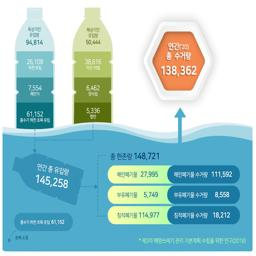

In [82]:
Image.open(a[0].metadata['image'])

In [83]:
import base64

with open("C:/project4/chat/images/resize_5.jpg", "rb") as image_file:
    # 이미지 파일 읽기
    image_data = image_file.read()
    # Base64 인코딩
    encoded_image = base64.b64encode(image_data)

In [84]:
type(encoded_image)

bytes

In [85]:
embeddings = OpenAIEmbeddings()

# Chroma 저장소 가져오기
vectorstore = Chroma(embedding_function=OpenAIEmbeddings(), persist_directory='C:/project4/chat/ImgtestDB')

In [93]:
import pickle

with open('splits_rag2.pkl', 'wb') as f:
    pickle.dump(splits, f)
    
with open('splits_rag2.pkl', 'rb') as f:
    docs = pickle.load(f)

# DB에서 document 서치

In [94]:
vectorstore.get()

{'ids': ['c2e8300d-8dcc-4ffc-b6e1-7dfabab4ef7a',
  'fb6bf53b-244a-43bd-a31b-45779be7be4e',
  '1d94fd25-3356-4b24-8a07-4920ee78bfd2',
  '111a7e68-e5e1-48c8-83b4-77ecd3aa540f',
  '7d33fb50-affb-4e25-914c-3999e41fbdc5',
  '3e706abf-f2e5-45f5-a9a5-cec7c86a5b9e',
  'cbd967c1-caae-4bdd-b930-4d830e31593b',
  'ba1f3100-8d8f-40ca-bf8f-7efe9ec5cbbd',
  '6c55d02e-a7c2-42a3-88d2-be99c86a4d74',
  '068809cf-dfd6-4280-9d2f-1a163e411f1b',
  '51937aad-0e36-44e3-a1e5-d56facab90f3',
  '1385a0b3-827f-47a8-be25-26c5fd183a13',
  '576b49e9-885d-470c-80b2-2d7097cb988c',
  '02456d95-906f-496e-bb75-70bc4f069e00',
  '7208e360-c66e-4e9f-8fc2-ea68d14769ad',
  'f7ee044d-9af9-43d1-8d02-a2adef39cc7a',
  'ae376013-45ee-4719-a36b-c20176b924ce',
  '83ab4c8a-a6a0-4392-809f-506bca82ae42',
  'a6164f3d-bb52-4911-a152-c89505d08daa',
  '95390d95-73ba-4f14-bdbb-cb8b44092fcb',
  'fad35afd-4406-43fc-a910-bb42a9a20f47',
  '46776752-4e8c-4b83-bba4-e000bd495f34',
  '0014c694-bb20-49cb-8634-f2ce6b59f606',
  '08154c50-2504-4770-a04d-

In [95]:
vectorstore.get().keys()

dict_keys(['ids', 'embeddings', 'documents', 'uris', 'data', 'metadatas', 'included'])

In [97]:
vectorstore.get()['metadatas']

[{'image': 'C:/project4/chat/images/resize_0.jpg',
  'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU',
  'page': 0,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_0.jpg',
  'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU',
  'page': 0,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_0.jpg',
  'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU',
  'page': 0,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_0.jpg',
  'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU',
  'page': 0,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_0.jpg',
  'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU',
  'page': 0,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.yo

In [112]:
vectorstore.get(where={'page':5}) # metadata로

{'ids': ['e23d3e7e-2356-4fd6-92c5-a27cfa440d45',
  '8b21f9b0-eab4-4f89-880d-9efa99acd305',
  '352528dd-e7e3-4d43-be28-c6115dbec165'],
 'embeddings': None,
 'documents': ["4. 호주 시드니  해변의  검은 공 \n최근 호주 시드니의  한 해변에  골프공  크기의  끈적끈적한  검은 공이 떠밀려와  당국이  해변을  폐\n쇄하는  일이 발생했습니다 . 호주 정부는  쿠지 해변과  고든스  베이 해변을  시작으로  총 7개 해변\n을 폐쇄했다 . 폐쇄 이유는  해변으로  떠밀려온  '검은 공' 때문이었습니다 . 시의회가  성분을  조사한  \n결과, 이 검은 공은 탄화수소  기반 오염물질인  것으로  알려졌습니다 . 바다로  빠져나간  석유가  다",
  '른 물질과  응고되고  응축돼  만들어지고 , 파도와  해류에  씻기며  공 모양으로  다듬어집니다 . 한 마\n디로 석유가  이물질과  함께 뭉친 타르볼입니다 . 기름 찌꺼기  덩어리인  타르볼은  시추지나  기름 \n누출 사고 인근에서  주로 목격됩니다 . 전문가들은  갑자기  너무 많은 수의 타르볼이  균일한  크기\n와 모양으로  만들어졌다며  “가까이서  만들어진  것 같다”고 추측했지만 , 인근에서  석유 유출 사고\n를 단 한 건도 보고받지  못했다고  밝혔습니다 . 현재 타르볼  제거 작업에  들어갔지만  이는 모래사',
  '장으로  떠밀려온  타르볼에  한해서이고 , 여전히  바다 안에 절반 정도가  남아있을  것으로 추정됩니\n다. 샤론 후크 박사는  “바다 표면 아래에  타르볼이  떠다니거나  그 중 일부가  바닥으로  가라앉았다\n면, 해양 생물은  물론 전체 식량 생태계가  영향을  받을 것”이라고  우려했습니다 . 또한 해양 생물\n이 이를 섭취하게  되면 위장이  막혀 음식을  소화하지  못할 수도 있고, 바다새  등 동물의  털에 타\n르볼이  묻어

In [121]:
vectorstore.get(where=({'image': ''}))

{'ids': ['3e706abf-f2e5-45f5-a9a5-cec7c86a5b9e',
  'cbd967c1-caae-4bdd-b930-4d830e31593b',
  'ba1f3100-8d8f-40ca-bf8f-7efe9ec5cbbd',
  '6c55d02e-a7c2-42a3-88d2-be99c86a4d74',
  '068809cf-dfd6-4280-9d2f-1a163e411f1b',
  '51937aad-0e36-44e3-a1e5-d56facab90f3',
  'd94d5a3d-ff85-4478-94ba-56143740caef',
  '1acfe469-2f5f-455e-af19-52b2648e5c7f',
  '5b38c941-6943-45d9-8c17-20eaba5f2d42',
  '63a9b77b-027c-413d-820d-2c39fa608636'],
 'embeddings': None,
 'documents': ['때문이고 , 어업 생산성을  떨어뜨립니다 . 또한 바다생물의  서식지를  파괴하고  더 나아가  바다생물\n을 죽이기까지  합니다 . 떠밀려온  해양쓰레기로  인해 국가간  갈등을  유발하고 , 해양쓰레기  수거/처\n리에 많은 비용이  들어갑니다 . \n1. 해양쓰레기로  인한 선박 사고 \n바다에  버려진  밧줄, 어망이  선박의  추진기에  감기거나 , 비닐봉지가  냉각수  파이프에  빨려 들어가\n면 엔진에  부하가  걸려 운항을  할 수 없기 때문에  이를 제거해야만  합니다 . 우리나라의  선박사고',
  '원인 중 10분 1은 해양쓰레기 가 원인입니다 . \n2. 해양쓰레기로  인해 어업 생산성  떨어짐  \n어망에  어획물만이  아니라 쓰레기까지  걸려 올라오는  경우가  자주 발생합니다 . 일일이  골라 내야 \n하기 때문에  조업이  늦어지거나  어망이  망가져  다시 구입해야  하는 경우도  생깁니다 . 잡은 것을 \n가공할  때 작은 쓰레기  조각 하나라도  들어가지  않게 하려면  더 많은 작업이  필요합니다 . 해양쓰\

In [ ]:
vectorstore.get(where=({'image': ''}))['metadatas']

[{'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': '',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'so

In [131]:
results = vectorstore.get(where={'image': ''})

# 결과 출력
for metadata, document in zip(results['metadatas'], results['documents']):
    print(f"Metadata: {metadata}")
    print(f"Document: {document}")
    print("-" * 40)

Metadata: {'image': '', 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'page': 1, 'source': 'C:/project4/chat/RAG데이터2.pdf'}
Document: 때문이고 , 어업 생산성을  떨어뜨립니다 . 또한 바다생물의  서식지를  파괴하고  더 나아가  바다생물
을 죽이기까지  합니다 . 떠밀려온  해양쓰레기로  인해 국가간  갈등을  유발하고 , 해양쓰레기  수거/처
리에 많은 비용이  들어갑니다 . 
1. 해양쓰레기로  인한 선박 사고 
바다에  버려진  밧줄, 어망이  선박의  추진기에  감기거나 , 비닐봉지가  냉각수  파이프에  빨려 들어가
면 엔진에  부하가  걸려 운항을  할 수 없기 때문에  이를 제거해야만  합니다 . 우리나라의  선박사고
----------------------------------------
Metadata: {'image': '', 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'page': 1, 'source': 'C:/project4/chat/RAG데이터2.pdf'}
Document: 원인 중 10분 1은 해양쓰레기 가 원인입니다 . 
2. 해양쓰레기로  인해 어업 생산성  떨어짐  
어망에  어획물만이  아니라 쓰레기까지  걸려 올라오는  경우가  자주 발생합니다 . 일일이  골라 내야 
하기 때문에  조업이  늦어지거나  어망이  망가져  다시 구입해야  하는 경우도  생깁니다 . 잡은 것을 
가공할  때 작은 쓰레기  조각 하나라도  들어가지  않게 하려면  더 많은 작업이  필요합니다 . 해양쓰
레기 때문에  어획량  자체가  줄어들기도  합니다 . 
3. 해양쓰레기로  인해 바다생물의  피해
----------------------------------------
Metadata: {'image': '', 'news': 'https://www.youtube.com/

In [132]:
results = vectorstore.get(where={'image': ''})

# 결과 출력
for metadata, document, ids in zip(results['metadatas'], results['documents'], results['ids']):
    print(f"Metadata: {metadata}")
    print(f"Document: {document}")
    print(f"Id: {ids}")
    print("-" * 40)

Metadata: {'image': '', 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'page': 1, 'source': 'C:/project4/chat/RAG데이터2.pdf'}
Document: 때문이고 , 어업 생산성을  떨어뜨립니다 . 또한 바다생물의  서식지를  파괴하고  더 나아가  바다생물
을 죽이기까지  합니다 . 떠밀려온  해양쓰레기로  인해 국가간  갈등을  유발하고 , 해양쓰레기  수거/처
리에 많은 비용이  들어갑니다 . 
1. 해양쓰레기로  인한 선박 사고 
바다에  버려진  밧줄, 어망이  선박의  추진기에  감기거나 , 비닐봉지가  냉각수  파이프에  빨려 들어가
면 엔진에  부하가  걸려 운항을  할 수 없기 때문에  이를 제거해야만  합니다 . 우리나라의  선박사고
Id: 3e706abf-f2e5-45f5-a9a5-cec7c86a5b9e
----------------------------------------
Metadata: {'image': '', 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'page': 1, 'source': 'C:/project4/chat/RAG데이터2.pdf'}
Document: 원인 중 10분 1은 해양쓰레기 가 원인입니다 . 
2. 해양쓰레기로  인해 어업 생산성  떨어짐  
어망에  어획물만이  아니라 쓰레기까지  걸려 올라오는  경우가  자주 발생합니다 . 일일이  골라 내야 
하기 때문에  조업이  늦어지거나  어망이  망가져  다시 구입해야  하는 경우도  생깁니다 . 잡은 것을 
가공할  때 작은 쓰레기  조각 하나라도  들어가지  않게 하려면  더 많은 작업이  필요합니다 . 해양쓰
레기 때문에  어획량  자체가  줄어들기도  합니다 . 
3. 해양쓰레기로  인해 바다생물의  피해
Id: cbd967c1-caae-4bdd-b930-4d830e31593b
----------------

# DB에서 document 업데이트/ 삭제 추가

In [207]:
page1 = vectorstore.get(where={'page': 1})
# print(page1)

for metadata, document, ids in zip(page1['metadatas'], page1['documents'], page1['ids']):
    metadata['image'] = 'C:/project4/chat/images/resize_1.jpg' 
    updated_document = Document(
        page_content=document,
        metadata=metadata
    )

    vectorstore.update_documents(ids=[ids],documents=[updated_document])

In [208]:
vectorstore.get(where={'page': 1})['metadatas']

[{'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_1.jpg',
  'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI',
  'page': 1,
  'source': 'C:/project4/chat/RAG데이터2.pdf'}]

In [209]:
page6 = vectorstore.get(where={'page': 6})

for metadata, document, ids in zip(page6['metadatas'], page6['documents'], page6['ids']):
    metadata['image'] = 'C:/project4/chat/images/resize_6.jpg' 
    updated_document = Document(
        page_content=document,
        metadata=metadata
    )

    vectorstore.update_documents(ids=[ids],documents=[updated_document])

In [210]:
vectorstore.get(where={'page': 6})['metadatas']

[{'image': 'C:/project4/chat/images/resize_6.jpg',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_6.jpg',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_6.jpg',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'source': 'C:/project4/chat/RAG데이터2.pdf'},
 {'image': 'C:/project4/chat/images/resize_6.jpg',
  'news': 'https://www.youtube.com/watch?v=8En5Q6_LtyM',
  'page': 6,
  'source': 'C:/project4/chat/RAG데이터2.pdf'}]

In [211]:
vectorstore.get(where={'image':''})

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [166]:
noimg = vectorstore.get(where={'image':''})
vectorstore.delete(ids=noimg['ids'])


In [167]:
vectorstore.get(where={'image':''})

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [ ]:


# 기존 문서를 삭제하고 새 메타데이터로 추가
vectorstore.delete_documents({"metadata": {"source": "source1"}})

# 새로운 메타데이터로 문서 추가
doc2 = Document(
    page_content="새로운 내용입니다.",
    metadata={"source": "source1", "author": "author2"}
)
vectorstore.add_documents([doc2])

# 다시 보기

In [212]:
# 임베딩 후 DB에 저장
vectorstore = Chroma(embedding_function=OpenAIEmbeddings(), persist_directory='C:/project4/chat/ImgtestDB')

In [213]:
vectorstore.get(where={'image':''})

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [214]:
vectorstore.get(where={'page':1})

{'ids': ['50d111f0-842a-4dc0-b19f-d7d6555903a1',
  '5d584606-fa2d-427f-b01f-2b977b7292f1',
  'f5974b86-5cf2-4090-b165-0b2474955ed0',
  '93ff6ded-b23e-4b43-8cac-02f2afd01e12',
  '6e83c870-26b0-47e7-8949-f2abf51f10f9',
  '555fd7e8-fa48-47d7-8e60-1aa3ff18cc8a'],
 'embeddings': None,
 'documents': ['때문이고 , 어업 생산성을  떨어뜨립니다 . 또한 바다생물의  서식지를  파괴하고  더 나아가  바다생물\n을 죽이기까지  합니다 . 떠밀려온  해양쓰레기로  인해 국가간  갈등을  유발하고 , 해양쓰레기  수거/처\n리에 많은 비용이  들어갑니다 . \n1. 해양쓰레기로  인한 선박 사고 \n바다에  버려진  밧줄, 어망이  선박의  추진기에  감기거나 , 비닐봉지가  냉각수  파이프에  빨려 들어가\n면 엔진에  부하가  걸려 운항을  할 수 없기 때문에  이를 제거해야만  합니다 . 우리나라의  선박사고',
  '원인 중 10분 1은 해양쓰레기 가 원인입니다 . \n2. 해양쓰레기로  인해 어업 생산성  떨어짐  \n어망에  어획물만이  아니라 쓰레기까지  걸려 올라오는  경우가  자주 발생합니다 . 일일이  골라 내야 \n하기 때문에  조업이  늦어지거나  어망이  망가져  다시 구입해야  하는 경우도  생깁니다 . 잡은 것을 \n가공할  때 작은 쓰레기  조각 하나라도  들어가지  않게 하려면  더 많은 작업이  필요합니다 . 해양쓰\n레기 때문에  어획량  자체가  줄어들기도  합니다 . \n3. 해양쓰레기로  인해 바다생물의  피해',
  '3. 해양쓰레기로  인해 바다생물의  피해 \n바다동물의  목, 다리, 부리, 날개 등에 낚싯줄 , 밧줄, 그물, 풍선줄  등이 걸리면  적을 피하기도 , 먹\n잇감을  잡을 수도 없어 생

In [215]:
vectorstore.get(where={'page':6})

{'ids': ['501c5882-8216-4adf-a069-4df7b235aeff',
  '87c1746e-03ed-4622-b080-3ddea9353015',
  'f0d08708-f3f1-4b47-a594-d668f94ec4ce',
  'c4abe8f0-cf77-4eaa-ab0e-82503dac83e8'],
 'embeddings': None,
 'documents': ['[해양쓰레기  피해 사례 – 피해 받는 동식물들 ] \n해양 플라스틱  오염은  해양생물에  심각한  영향을  미칩니다 . 해양 생물들이  바다에  떠다니는  플라\n스틱에  때문에  상처를  입거나  덫에 걸리는가  하면, 바다거북은  비닐봉지가  해파리인  줄 알고 삼\n키고, 바닷새  역시 수면에  떠다니는  플라스틱을  먹이로  착각합니다 . 이렇게  플라스틱을  섭취한  해\n양 생물들은  위장에  플라스틱이  가득 차 죽음에  이르게 됩니다 . 고래 역시 플라스틱  조각을  먹습',
  '니다. 2019 년 말 스코틀랜드  해변에  좌초한  고래 뱃속에서는  100kg 에 달하는  플라스틱  어구와  포\n장 끈, 비닐봉지 , 플라스틱  컵 등이 나왔습니다 . \n \n1. 우리나라  연안에서  발견된  바다  거북  \n우리나라  연안에서  발견된  바다거북  10마리 중 8마리가  플라스틱을  먹은 것으로  확인됐다 . 바다\n거북 소화기관에는  플라스틱뿐  아니라  비닐, 테이프 , 낚시줄  등 생활쓰레기가  뒤엉켜있었습니다 .',
  '우리나라  연안에서  발견된  바다거북  폐사체   34마리 중 28마리가  해양 플라스틱을  섭식했다고  \n밝혀졌습니다 . 주요 플라스틱으로는  육상에서  바다로  유입된  일회용  포장재와  어업 기원 쓰레기\n였습니다 . \n연구진은  최근까지  우리나라  연안에서  발견된  총 61마리의  바다거북  사체에  대한 공동부검 을 진\n행했을  때, 바다거북  34마리 중 28마리에서  총 1280개(118g) 에 플라스틱이  발견

In [199]:
vectorstore.get(where={'page':4})

{'ids': ['fad35afd-4406-43fc-a910-bb42a9a20f47',
  '46776752-4e8c-4b83-bba4-e000bd495f34',
  '0014c694-bb20-49cb-8634-f2ce6b59f606',
  '08154c50-2504-4770-a04d-3060c7c9c946',
  'd605821e-7102-477f-ac7f-8635ceb0e811',
  '5b6bc992-840b-4271-9fdc-dd6adbe2ecb1',
  '924813b5-6fe1-4fb7-9380-a30e06db22eb',
  '57678604-6296-414c-859a-b38633e5db0f',
  'd26231e2-5a68-4890-b946-a0b6e2204edb',
  '29063833-3ae2-4d14-904b-12a802d8799c',
  '8c3491a5-fdbf-48e5-b2d7-0d52ae0c7400',
  '8706d1d9-ce45-45b8-b7f2-6e3128c57033',
  '7e782777-2147-4457-b26c-13f2a78fdfd7',
  '527178e6-6c75-48a9-afd0-c02a0fc966af',
  '0d7ac8bd-70c1-4f91-a56f-3cd03b382745',
  '01a23a56-6163-4dc1-8aa9-916d01986c58',
  '4bf5fbef-f833-461a-b892-b3814c393552',
  'efa3ddd1-6392-4de2-8471-7e14f486e3d0'],
 'embeddings': None,
 'documents': ['3. 허베이스피릿호  원유유출사고  \n2007년 12월 7일 오전 충남 앞 바다에서  이동 중이던  삼성중공업  소유의  크레인이  예인선과의  \n연결이  끊어지며  입항 대기중이던  14만6천 톤 규모의  유조선  허베이  스피리트 (Hebei Sprit) 호와 \n충돌했고 , 유조선에  선적되어  있던 약 12,547 ㎘의 원유가  해상으로  유출